In [1]:
import pandas as pd
import seaborn as sb

In [2]:
arquivo = pd.read_csv('c:/Users/Angelo/Downloads/solicitacoescredito.csv')
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [11]:
#Remover transacaoes que nao passaram por analise de credito
arquivo['percentualProtestos'].fillna(0,inplace=True)
limpo = arquivo.drop(['numero_solicitacao','razaoSocial','nomeFantasia','cnpjSemTraco','ativoCirculante','passivoCirculante','totalAtivo','totalPatrimonioLiquido','endividamento','duplicatasAReceber','estoque','anoFundacao','intervaloFundacao','anoFundacao','capitalSocial','periodoDemonstrativoEmMeses','periodoBalanco'], 1)
limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  8973 non-null   int64  
 1   margemBrutaAcumulada         8973 non-null   float64
 2   percentualProtestos          8973 non-null   float64
 3   primeiraCompra               8867 non-null   object 
 4   prazoMedioRecebimentoVendas  8973 non-null   int64  
 5   titulosEmAberto              8973 non-null   float64
 6   valorSolicitado              8973 non-null   float64
 7   status                       8973 non-null   object 
 8   definicaoRisco               8973 non-null   object 
 9   diferencaPercentualRisco     8973 non-null   float64
 10  percentualRisco              8973 non-null   float64
 11  dashboardCorrelacao          8973 non-null   float64
 12  valorAprovado                7569 non-null   float64
 13  dataAprovadoEmComi

In [24]:
statusvalidos = ['EmAnaliseDocumentacao','AguardandoAprovacao','DocumentacaoReprovada']
filtrado = limpo.loc[~limpo['status'].isin(statusvalidos)]
filtrado.head(50)
#filtrado.info()

,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,...,valorAprovado,dataAprovadoEmComite,faturamentoBruto,margemBruta,custos,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.716981,...,50000.0,NaN,1766880.0,0.0,0.0,False,True,1.000000,43200.0,2020-02-03T20:57:33
2,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,20000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.716981,...,20000.0,NaN,2814940.0,0.0,0.0,False,True,1.000000,4320.0,2020-02-04T16:40:49
3,20,0.000000,0.0,2017-02-13T17:20:27,0,0.00,25000.0,AprovadoAnalista,De 51 a 80 % - Alto,0.396226,...,15000.0,NaN,1285274.0,0.0,0.0,False,True,0.000000,5920.0,2020-02-04T16:37:52
4,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.830189,...,50000.0,NaN,40779757.0,81459809.0,40680051.0,False,False,1.000000,89000.0,2020-02-04T15:06:28
5,0,0.000000,0.0,2019-06-28T10:25:57,0,0.00,25000.0,AprovadoAnalista,De 31 a 50 % - Médio,0.622642,...,20000.0,NaN,918476.0,0.0,0.0,False,True,0.000000,38400.0,2020-02-04T15:10:46
6,16,0.000000,0.0,2011-03-02T11:27:13,0,0.00,100000.0,AprovadoAnalista,De 31 a 50 % - Médio,0.584906,...,80000.0,NaN,239016696.0,-7540544.0,156394112.0,True,False,0.000000,18132588.0,2020-02-05T14:31:22
7,4,0.350175,0.0,2007-07-02T00:00:00,102,208980.00,300000.0,AprovadoAnalista,De 0 a 10 % - Muito Baixo,0.943396,...,300000.0,NaN,11958227.0,9357949.0,0.0,False,False,1.000000,768233.0,2020-02-05T20:05:40
8,43,0.245818,0.0,2006-07-10T00:00:00,27,6432.00,400000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.886792,...,400000.0,NaN,72479551.0,6233236.0,-49267738.0,False,False,1.000000,6910219.0,2020-02-05T20:07:07
10,7,0.000000,0.0,2012-02-24T16:01:26,0,0.00,1000000.0,AprovadoAnalista,De 31 a 50 % - Médio,0.603774,...,800000.0,NaN,4575646.0,296634.0,-3299332.0,False,True,0.000000,81000.0,2020-02-05T15:15:10
11,26,0.000000,0.0,2017-12-20T17:03:32,0,0.00,200000.0,AprovadoComite,De 31 a 50 % - Médio,0.584906,...,50000.0,2020-02-05T19:14:37,13871246.0,-772398.0,-9455401.0,False,False,0.000000,183509.0,NaN


In [25]:
filtrado.isnull().sum()

maiorAtraso                       0
margemBrutaAcumulada              0
percentualProtestos               0
primeiraCompra                   86
prazoMedioRecebimentoVendas       0
titulosEmAberto                   0
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                   0
dashboardCorrelacao               0
valorAprovado                   610
dataAprovadoEmComite           7621
faturamentoBruto                  4
margemBruta                       4
custos                            4
restricoes                        0
empresa_MeEppMei                  0
scorePontualidade                 0
limiteEmpresaAnaliseCredito       0
dataAprovadoNivelAnalista      1168
dtype: int64

In [26]:
filtrado.head()

,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,...,valorAprovado,dataAprovadoEmComite,faturamentoBruto,margemBruta,custos,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.716981,...,50000.0,NaN,1766880.0,0.0,0.0,False,True,1.0,43200.0,2020-02-03T20:57:33
2,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,20000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.716981,...,20000.0,NaN,2814940.0,0.0,0.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,20,0.000000,0.0,2017-02-13T17:20:27,0,0.00,25000.0,AprovadoAnalista,De 51 a 80 % - Alto,0.396226,...,15000.0,NaN,1285274.0,0.0,0.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.830189,...,50000.0,NaN,40779757.0,81459809.0,40680051.0,False,False,1.0,89000.0,2020-02-04T15:06:28
5,0,0.000000,0.0,2019-06-28T10:25:57,0,0.00,25000.0,AprovadoAnalista,De 31 a 50 % - Médio,0.622642,...,20000.0,NaN,918476.0,0.0,0.0,False,True,0.0,38400.0,2020-02-04T15:10:46


<AxesSubplot:>

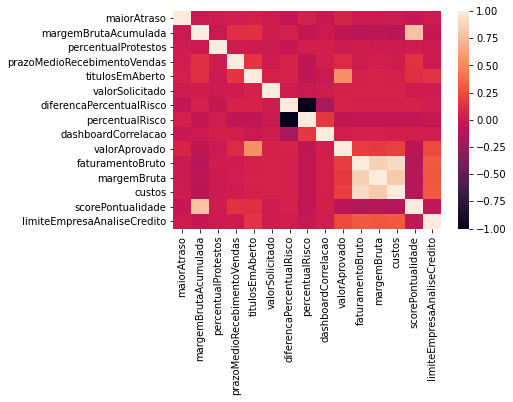

In [27]:
sb.heatmap(filtrado.corr())  